In [1]:
import vectorbt as vbt
import numpy
from numba import njit
import warnings

warnings.filterwarnings("ignore")

In [2]:
btc_price_1d = vbt.YFData.download("META",
                                   missing_index="drop",
                                  interval="1d",
                                  start="2020-01-01").get("Close")
btc_price_1d

Date
2019-12-31 05:00:00+00:00    205.250000
2020-01-02 05:00:00+00:00    209.779999
2020-01-03 05:00:00+00:00    208.669998
2020-01-06 05:00:00+00:00    212.600006
2020-01-07 05:00:00+00:00    213.059998
                                ...    
2023-08-14 04:00:00+00:00    306.190002
2023-08-15 04:00:00+00:00    301.950012
2023-08-16 04:00:00+00:00    294.290009
2023-08-17 04:00:00+00:00    285.089996
2023-08-18 04:00:00+00:00    283.250000
Name: Close, Length: 915, dtype: float64

In [7]:
windows = numpy.linspace(10,1000,num=100, dtype=int)
results = vbt.MA.run(btc_price_1d, window=windows)


ma_window,10,20,30,40,50,60,70,80,90,100,...,910,920,930,940,950,960,970,980,990,1000
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31 05:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-02 05:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-03 05:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-06 05:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-07 05:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14 04:00:00+00:00,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-08-15 04:00:00+00:00,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-08-16 04:00:00+00:00,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
entries = results.ma_above(btc_price_1d)
exits = results.ma_below(btc_price_1d)

In [9]:
pf_kwargs = dict(size=numpy.inf, fees=0.001, freq='1D')
pf = vbt.Portfolio.from_signals(btc_price_1d, entries, exits, **pf_kwargs)

In [10]:
pf.total_return()

ma_window
10      0.229384
20      0.079233
30     -0.020853
40     -0.328582
50      0.129328
          ...   
960     0.000000
970     0.000000
980     0.000000
990     0.000000
1000    0.000000
Name: total_return, Length: 100, dtype: float64

In [11]:
pf.wrapper.columns

Index([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,  120,
        130,  140,  150,  160,  170,  180,  190,  200,  210,  220,  230,  240,
        250,  260,  270,  280,  290,  300,  310,  320,  330,  340,  350,  360,
        370,  380,  390,  400,  410,  420,  430,  440,  450,  460,  470,  480,
        490,  500,  510,  520,  530,  540,  550,  560,  570,  580,  590,  600,
        610,  620,  630,  640,  650,  660,  670,  680,  690,  700,  710,  720,
        730,  740,  750,  760,  770,  780,  790,  800,  810,  820,  830,  840,
        850,  860,  870,  880,  890,  900,  910,  920,  930,  940,  950,  960,
        970,  980,  990, 1000],
      dtype='int32', name='ma_window')

In [12]:
pf[10].stats()

Start                          2019-12-31 05:00:00+00:00
End                            2023-08-18 04:00:00+00:00
Period                                 915 days 00:00:00
Start Value                                        100.0
End Value                                     122.938381
Total Return [%]                               22.938381
Benchmark Return [%]                           38.002436
Max Gross Exposure [%]                             100.0
Total Fees Paid                                18.139398
Max Drawdown [%]                               39.466325
Max Drawdown Duration                  452 days 00:00:00
Total Trades                                          82
Total Closed Trades                                   81
Total Open Trades                                      1
Open Trade PnL                                -12.891779
Win Rate [%]                                   79.012346
Best Trade [%]                                 10.387455
Worst Trade [%]                

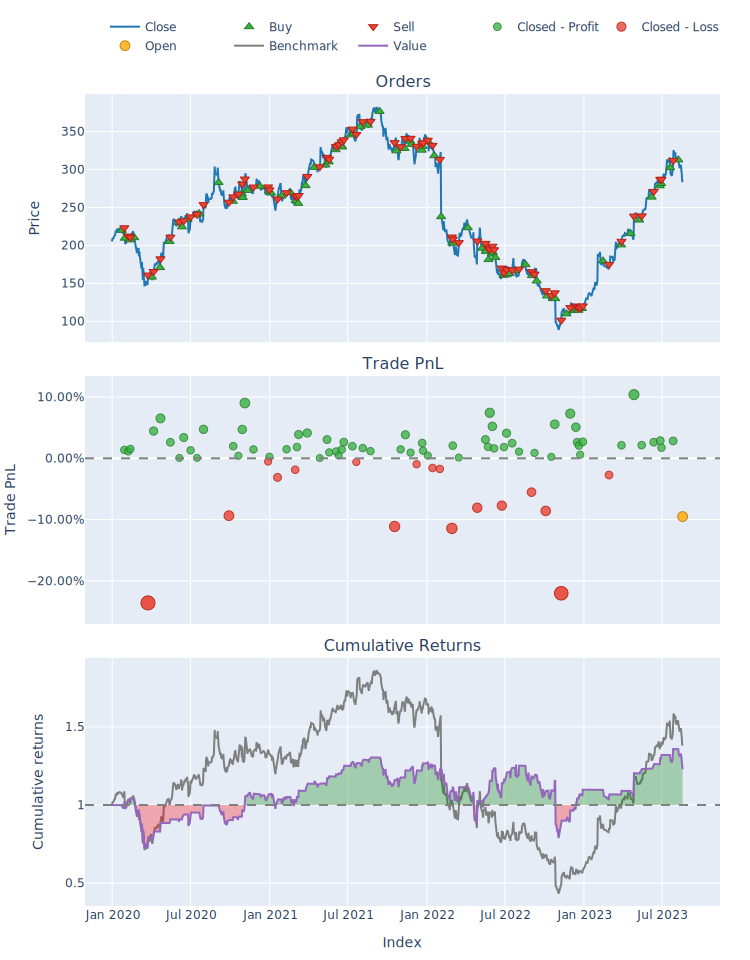

In [13]:
pf[10].plot().show_svg()